In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [16]:
with open('data/net-traffic/AbileneFlows/odnames','r') as f:
    odnames = [line.strip() for line in f]
dates = pd.date_range('9/1/2003',freq='10min',periods=1008)
Atraf = pd.read_csv('data/net-traffic/AbileneFlows/X',sep='  ',header=None,names=odnames,engine='python')
Atraf.index = dates
# Atraf

In [10]:
std_atraf = StandardScaler().fit_transform(Atraf)
# pd.DataFrame(Atraf)

In [55]:
pca = PCA(n_components=5)
pca.fit(std_atraf)
projection = (np.matmul(pca.components_, std_atraf.T)).T

# pd.DataFrame(projection)

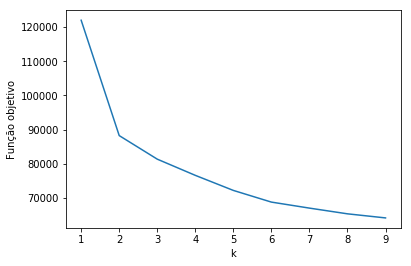

In [59]:
inertia = []
k = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(std_atraf)
    inertia.append(kmeans.inertia_)
    k.append(i)
_haha = plt.plot(k, inertia)
plt.xlabel("k")
_haha = plt.ylabel("Função objetivo")